In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
#from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
#from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn import preprocessing
from numpy import unravel_index
from matplotlib.colors import ListedColormap
from numpy import linspace
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
# column noames to filter for experiments

LAI = ['LAI_0322', 'LAI_0421', 'LAI_0513', 'LAI_0617', 
       'LAI_0702', 'LAI_0720', 'LAI_0809', 'LAI_0821', 'LAI_0920']

S2 = ['B02_0322', 'B03_0322', 'B04_0322', 'B05_0322',
       'B06_0322', 'B07_0322', 'B08A_0322', 'B08_0322', 'B11_0322', 'B12_0322',
       'B02_0421', 'B03_0421', 'B04_0421', 'B05_0421', 'B06_0421',
       'B07_0421', 'B08A_0421', 'B08_0421', 'B11_0421', 'B12_0421',
       'B02_0513', 'B03_0513', 'B04_0513', 'B05_0513', 'B06_0513', 'B07_0513',
       'B08A_0513', 'B08_0513', 'B11_0513', 'B12_0513', 'B02_0617',
       'B03_0617', 'B04_0617', 'B05_0617', 'B06_0617', 'B07_0617', 'B08A_0617',
       'B08_0617', 'B11_0617', 'B12_0617', 'B02_0702', 'B03_0702',
       'B04_0702', 'B05_0702', 'B06_0702', 'B07_0702', 'B08A_0702', 'B08_0702',
       'B11_0702', 'B12_0702', 'B02_0720', 'B03_0720', 'B04_0720',
       'B05_0720', 'B06_0720', 'B07_0720', 'B08A_0720', 'B08_0720', 'B11_0720',
       'B12_0720', 'B02_0809', 'B03_0809', 'B04_0809', 'B05_0809',
       'B06_0809', 'B07_0809', 'B08A_0809', 'B08_0809', 'B11_0809', 'B12_0809',
       'B02_0821', 'B03_0821', 'B04_0821', 'B05_0821', 'B06_0821',
       'B07_0821', 'B08A.jp_0821', 'B08_0821', 'B11_0821', 'B12_0821',
       'B02_0920', 'B03_0920', 'B04_0920', 'B05_0920', 'B06_0920',
       'B07_0920', 'B08A_0920', 'B08_0920', 'B11_0920', 'B12_0920']

S1 = ['VH_20180303', 'VV_20180303', 'VH_20180311', 'VV_20180311',
       'VH_20180315', 'VV_20180315', 'VH_20180323', 'VV_20180323',
       'VH_20180327', 'VV_20180327', 'VH_20180404', 'VV_20180404',
       'VH_20180408', 'VV_20180408', 'VH_20180416', 'VV_20180416',
       'VH_20180420', 'VV_20180420', 'VH_20180428', 'VV_20180428',
       'VH_20180502', 'VV_20180502', 'VH_20180510', 'VV_20180510',
       'VH_20180522', 'VV_20180522', 'VH_20180526', 'VV_20180526',
       'VH_20180603', 'VV_20180603', 'VH_20180607', 'VV_20180607',
       'VH_20180615', 'VV_20180615', 'VH_20180619', 'VV_20180619',
       'VH_20180627', 'VV_20180627', 'VH_20180701', 'VV_20180701',
       'VH_20180709', 'VV_20180709', 'VH_20180713', 'VV_20180713',
       'VH_20180721', 'VV_20180721', 'VH_20180725', 'VV_20180725',
       'VH_20180802', 'VV_20180802', 'VH_20180806', 'VV_20180806',
       'VH_20180814', 'VV_20180814', 'VH_20180818', 'VV_20180818',
       'VH_20180826', 'VV_20180826', 'VH_20180830', 'VV_20180830',
       'VH_20180907', 'VV_20180907', 'VH_20180911', 'VV_20180911',
       'VH_20180919', 'VV_20180919', 'VH_20180923', 'VV_20180923',
       'VH_20180305', 'VV_20180305', 'VH_20180309', 'VV_20180309',
       'VH_20180317', 'VV_20180317', 'VH_20180321', 'VV_20180321',
       'VH_20180329', 'VV_20180329', 'VH_20180402', 'VV_20180402',
       'VH_20180410', 'VV_20180410', 'VH_20180414', 'VV_20180414',
       'VH_20180422', 'VV_20180422', 'VH_20180426', 'VV_20180426',
       'VH_20180504', 'VV_20180504', 'VH_20180508', 'VV_20180508',
       'VH_20180516', 'VV_20180516', 'VH_20180520', 'VV_20180520',
       'VH_20180528', 'VV_20180528', 'VH_20180601', 'VV_20180601', 
       'VH_20180609', 'VV_20180609', 'VH_20180613', 'VV_20180613', 
       'VH_20180621', 'VV_20180621', 'VH_20180625',
       'VV_20180625', 'VH_20180703', 'VV_20180703', 'VH_20180707',
       'VV_20180707', 'VH_20180715', 'VV_20180715', 'VH_20180719',
       'VV_20180719', 'VH_20180727', 'VV_20180727', 'VH_20180731',
       'VV_20180731', 'VH_20180808', 'VV_20180808', 'VH_20180812',
       'VV_20180812', 'VH_20180820', 'VV_20180820', 'VH_20180824',
       'VV_20180824', 'VH_20180901', 'VV_20180901', 'VH_20180905',
       'VV_20180905', 'VH_20180913', 'VV_20180913', 'VH_20180917',
       'VV_20180917', 'VH_20180925', 'VV_20180925', 'VH_20180929',
       'VV_20180929'] 

In [3]:
#####################
###   load data   ###
#####################

# load datasets
data_path = "/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s1_s2_raster/data/train_data_org.csv"
train_org = pd.read_csv(data_path, delimiter = ',', index_col=0)
data_path = "/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s1_s2_raster/data/test_data.csv"
test_org = pd.read_csv(data_path, delimiter = ',', index_col=0)

In [4]:
###########################
###   preprocess data   ###
###########################

experiment = LAI

# filter for experiments
train = train_org[['crop_id', 'geometry'] + experiment]
test = test_org[['crop_id', 'geometry'] + experiment]

train = shuffle(train, random_state=399)

X_train = train.drop(['crop_id','geometry'], axis=1).values
y_train = train['crop_id'].values
X_test = test.drop(['crop_id','geometry'], axis=1).values
y_test = test['crop_id'].values

print("Train: number of instances: {}, number of attributes: {}".format(train.shape[0], train.shape[1]))
print("Test: number of instances: {}, number of attributes: {}".format(test.shape[0], test.shape[1]))

Train: number of instances: 1200, number of attributes: 11
Test: number of instances: 4584, number of attributes: 11


In [5]:
##########################
###   exploring data   ###
##########################

print(train.head(7))

train.describe()

      crop_id                                     geometry  LAI_0322  \
id                                                                     
168         2  POINT (634740.5100236891 5339978.909767563)        36   
669        10   POINT (624908.0456842275 5335769.90775792)       -31   
1157       15  POINT (621332.3669208327 5360109.999892802)       108   
264         6  POINT (639971.0221898934 5343010.385524059)       109   
194         2   POINT (639366.526787769 5338334.476987346)       -46   
679        10  POINT (620109.7202541821 5354703.312341657)       -74   
327         3  POINT (632185.2000834884 5348559.848026753)       581   

      LAI_0421  LAI_0513  LAI_0617  LAI_0702  LAI_0720  LAI_0809  LAI_0821  \
id                                                                           
168        124       212      1571      2456      1677      3656      2750   
669        240       240      1405      3185      1626       349       360   
1157       263       422       501     

,crop_id,LAI_0322,LAI_0421,LAI_0513,LAI_0617,LAI_0702,LAI_0720,LAI_0809,LAI_0821,LAI_0920
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,8.500000,194.252500,792.165833,863.820833,1640.691667,1926.732500,1436.435833,1051.773333,677.485833,535.388333
std,4.892506,324.810193,1151.337292,1085.610580,1485.749772,1744.913608,988.565723,1127.079973,785.011867,751.849365
min,1.000000,-202.000000,-44.000000,90.000000,137.000000,62.000000,169.000000,11.000000,-35.000000,-189.000000
25%,4.500000,-26.000000,178.000000,262.000000,460.000000,404.000000,797.000000,267.000000,234.000000,102.750000
50%,9.000000,76.500000,243.000000,329.000000,1094.500000,1328.500000,1598.000000,559.500000,375.000000,241.000000
75%,12.250000,316.000000,892.500000,842.250000,2458.000000,3088.000000,1622.250000,1346.750000,718.500000,686.250000
max,16.000000,1979.000000,6119.000000,6035.000000,13060.000000,9892.000000,11370.000000,6044.000000,4904.000000,6155.000000


In [6]:
############################
###   standardize data   ###
############################

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
##########################
##########################
###                    ###
###   Classification   ###
###                    ###
##########################
##########################

In [8]:
##########################################
###   RFC - Random Forest Classifier   ###
##########################################

In [9]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=399, n_jobs=8)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(scores), scores)

0.6666666666666667 [0.58333333 0.65833333 0.63333333 0.68333333 0.69166667 0.65833333
 0.63333333 0.69166667 0.71666667 0.71666667]


In [6]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=399, n_jobs=8)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(scores), scores)

0.9662308509909756 [0.97033013 0.96698705 0.96155453 0.9653155  0.96030088 0.96573339
 0.96782282 0.96906355 0.96948161 0.96571906]


In [14]:
param_grid = [
    {'n_estimators': [1, 10, 100, 1000], 'criterion': ['gini', 'entropy'], \
     'max_depth': [None, 10, 100, 1000], 'max_features': ['sqrt', 'log2', None], },
 ]

In [15]:
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=8)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 10, 100, 1000],
                          'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [1, 10, 100, 1000]}])

In [16]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'log2', 'n_estimators': 1000}

Best mean cross-validated score: 0.7033333333333334

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.551 (+/-0.066) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1}
0.657 (+/-0.055) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
0.693 (+/-0.081) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.696 (+/-0.079) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
0.523 (+/-0.079) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 1}
0.662 (+/-0.076) for {'criterion': 'gini', 'max_d

In [6]:
param_grid = [
    {'n_estimators': [600,1000,3000], 'criterion': ['gini'], \
     'max_depth': [1000], 'max_features': ['sqrt'], },
 ]

In [7]:
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=8)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [21]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'criterion': 'gini', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 600}

Best mean cross-validated score: 0.8358333333333332

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.836 (+/-0.045) for {'criterion': 'gini', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 600}
0.833 (+/-0.061) for {'criterion': 'gini', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 1000}
0.835 (+/-0.062) for {'criterion': 'gini', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 3000}
------------------------------------------------------------------------------------------------------


In [ ]:
###########################################
###   SVC - Support Vector Classifier   ###
###########################################

In [10]:
clf = SVC(kernel='linear', C=1, random_state=399)
scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=8)
print(np.mean(scores), scores)

0.6483333333333332 [0.65833333 0.61666667 0.6        0.625      0.71666667 0.68333333
 0.675      0.65       0.64166667 0.61666667]


In [11]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'kernel': ['poly']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']},
 ]

In [12]:
clf = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=8)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid']}])

In [13]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Best mean cross-validated score: 0.6883333333333334

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.648 (+/-0.068) for {'C': 1, 'kernel': 'linear'}
0.657 (+/-0.074) for {'C': 10, 'kernel': 'linear'}
0.660 (+/-0.081) for {'C': 100, 'kernel': 'linear'}
0.651 (+/-0.083) for {'C': 1000, 'kernel': 'linear'}
0.636 (+/-0.066) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.637 (+/-0.069) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.687 (+/-0.065) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.688 (+/-0.063) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.664 (+/-0.083) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.663 (+/-0.082) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.650 (+/-0.076) for {'C': 

In [12]:
######################
###   Prediction   ###
######################

In [11]:
# prediction with the best preforming model
clf = SVC(kernel='rbf', C=10, gamma='scale', random_state=399)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [12]:
pred = clf.predict(X_test)

In [13]:
confusion_matrix(y_test, pred)

array([[369,   1,   1,  18,   2,   1,   4,   1,   0,   1,   1,   1],
       [  2, 381,   0,  15,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 391,   6,   0,   0,   0,   0,   0,   0,   2,   1],
       [  5,   6,   6, 336,   9,   0,   2,   0,   2,   8,  20,   6],
       [  2,  14,   0,   8, 335,   3,   7,  16,   0,   0,  15,   0],
       [  2,   7,   0,  18,   3, 364,   2,   2,   0,   0,   0,   2],
       [  0,   0,   0,   6,   3,   3, 382,   4,   0,   0,   0,   2],
       [  1,   1,   0,   4,  14,   3,   8, 367,   0,   0,   2,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0, 388,   0,  10,   0],
       [  0,   0,   1,   4,   0,   0,   0,   3,   0, 387,   3,   2],
       [  3,   0,   0,   1,   3,   0,   0,   0,   0,   3, 370,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 204]])

In [14]:
accuracy_score(y_test, pred)

0.9323734729493892

In [11]:
# prediction with the best preforming model
clf = SVC(kernel='rbf', C=10, gamma='scale', random_state=399)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [12]:
pred = clf.predict(X_test)

In [13]:
confusion_matrix(y_test, pred)

array([[376,   0,   2,  10,   1,   6,   2,   2,   0,   0,   0,   1],
       [  4, 389,   0,   5,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 396,   2,   0,   0,   0,   0,   0,   1,   1,   0],
       [  6,   7,   6, 345,   7,   0,   1,   1,   2,   6,  16,   3],
       [  0,  11,   0,   5, 355,   1,   9,   5,   0,   0,  14,   0],
       [  5,   2,   0,   9,   2, 381,   0,   0,   0,   0,   0,   1],
       [  1,   0,   0,   2,   1,   4, 392,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   7,   0,   1, 389,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 396,   0,   4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 394,   3,   1],
       [  3,   0,   0,   1,   4,   0,   0,   0,   0,   0, 372,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 204]])

In [14]:
accuracy_score(y_test, pred)

0.9574607329842932

In [13]:
!pip install pytorch-tabnet wget

  Using cached pytorch_tabnet-3.1.1-py3-none-any.whl (39 kB)
Processing /home/philipp/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0/wget-3.2-py3-none-any.whl
  Using cached torch-1.9.0-cp38-cp38-manylinux1_x86_64.whl (831.4 MB)


In [16]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [39]:
l = round(X_train.shape[0]*0.9)

X_trainx = X_train[:l]
y_trainx = y_train[:l]

X_validx = X_train[l:]
y_validx = y_train[l:]

In [20]:
# network parameters
clf = TabNetClassifier(
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    #cat_idxs=cat_idxs,
    #cat_dims=cat_dims,
    cat_emb_dim=1,
    lambda_sparse=1e-2, momentum=0.3, #clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

Device used : cuda


In [22]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)], #(X_validx, y_validx)],
    eval_name=['train', 'valid'],
    max_epochs=100, patience=100,
    batch_size=16384, virtual_batch_size=512
)

epoch 0  | loss: 0.20292 | train_accuracy: 0.95391 | valid_accuracy: 0.8918  |  0:00:00s
epoch 1  | loss: 0.17289 | train_accuracy: 0.95437 | valid_accuracy: 0.90271 |  0:00:01s
epoch 2  | loss: 0.15513 | train_accuracy: 0.96895 | valid_accuracy: 0.90729 |  0:00:02s
epoch 3  | loss: 0.12155 | train_accuracy: 0.9682  | valid_accuracy: 0.90969 |  0:00:02s
epoch 4  | loss: 0.11428 | train_accuracy: 0.97263 | valid_accuracy: 0.90794 |  0:00:03s
epoch 5  | loss: 0.09591 | train_accuracy: 0.97526 | valid_accuracy: 0.91558 |  0:00:04s
epoch 6  | loss: 0.08564 | train_accuracy: 0.97823 | valid_accuracy: 0.92081 |  0:00:04s
epoch 7  | loss: 0.08166 | train_accuracy: 0.98178 | valid_accuracy: 0.92277 |  0:00:05s
epoch 8  | loss: 0.07454 | train_accuracy: 0.98362 | valid_accuracy: 0.92168 |  0:00:06s
epoch 9  | loss: 0.06978 | train_accuracy: 0.98458 | valid_accuracy: 0.92343 |  0:00:06s
epoch 10 | loss: 0.06363 | train_accuracy: 0.98349 | valid_accuracy: 0.92408 |  0:00:07s
epoch 11 | loss: 0.06

epoch 93 | loss: 0.00954 | train_accuracy: 0.99958 | valid_accuracy: 0.93499 |  0:01:05s
epoch 94 | loss: 0.00934 | train_accuracy: 0.99954 | valid_accuracy: 0.93477 |  0:01:05s
epoch 95 | loss: 0.00891 | train_accuracy: 0.99958 | valid_accuracy: 0.93695 |  0:01:06s
epoch 96 | loss: 0.00909 | train_accuracy: 0.99937 | valid_accuracy: 0.9363  |  0:01:07s
epoch 97 | loss: 0.00904 | train_accuracy: 0.99962 | valid_accuracy: 0.93695 |  0:01:07s
epoch 98 | loss: 0.00845 | train_accuracy: 0.99962 | valid_accuracy: 0.93848 |  0:01:08s
epoch 99 | loss: 0.00874 | train_accuracy: 0.99954 | valid_accuracy: 0.93608 |  0:01:09s
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_valid_accuracy = 0.93848
Best weights from best epoch are automatically used!


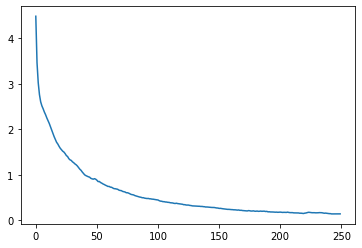

In [104]:
# plot losses
plt.plot(clf.history['loss'])

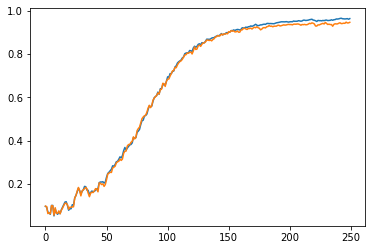

In [105]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

In [106]:
preds = clf.predict_proba(X_test)

In [107]:
y_preds = np.argmax(preds, axis=1)

In [108]:
crop_dict = {0:1, 1:2, 2:3, 3:5, 4:6, 5:8, 6:10, 7:11, 8:12, 9:13, 10:15, 11:16}

In [109]:
def replace_with_dict(ar, dic):
    # Extract out keys and values
    k = np.array(list(dic.keys()))
    v = np.array(list(dic.values()))

    # Get argsort indices
    sidx = k.argsort()

    # Drop the magic bomb with searchsorted to get the corresponding
    # places for a in keys (using sorter since a is not necessarily sorted).
    # Then trace it back to original order with indexing into sidx
    # Finally index into values for desired output.
    return v[sidx[np.searchsorted(k,ar,sorter=sidx)]]

In [110]:
y_preds = replace_with_dict(y_preds, crop_dict)

In [111]:
test_acc = accuracy_score(y_pred=y_preds, y_true=y_test)

print(f"BEST VALID SCORE FOR : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR : {test_acc}")

BEST VALID SCORE FOR : 0.9481821980777267
FINAL TEST SCORE FOR : 0.9081588132635253


In [30]:
train.groupby(['crop_id']).count()

,geometry,B02_0322,B03_0322,B04_0322,B05_0322,B06_0322,B07_0322,B08A_0322,B08_0322,B11_0322,...,VH_20180905,VV_20180905,VH_20180913,VV_20180913,VH_20180917,VV_20180917,VH_20180925,VV_20180925,VH_20180929,VV_20180929
crop_id,,,,,,,,,,,,,,,,,,,,,
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
6,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
8,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
10,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
11,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
12,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [26]:
test.groupby(['crop_id']).count()

,geometry,B02_0322,B03_0322,B04_0322,B05_0322,B06_0322,B07_0322,B08A_0322,B08_0322,B11_0322,...,VH_20180905,VV_20180905,VH_20180913,VV_20180913,VH_20180917,VV_20180917,VH_20180925,VV_20180925,VH_20180929,VV_20180929
crop_id,,,,,,,,,,,,,,,,,,,,,
1,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
2,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
3,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
5,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
6,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
8,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
10,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
11,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
12,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [31]:
1200+4584

5784